# Data Analysis of Super Store


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# setting seaborn style
sns.set(style="whitegrid")


import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing dataset in the dataset folder
df = pd.read_csv('../datasets/superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.shape

(9994, 21)

#### Missing Values

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# columns with object datatype with total number of columns
df.select_dtypes(include='object').columns, len(df.select_dtypes(include='object').columns)


(Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
        'Product ID', 'Category', 'Sub-Category', 'Product Name'],
       dtype='object'),
 15)

In [9]:
# columns with numerical datatype with total number of columns
df.select_dtypes(include='number').columns, len(df.select_dtypes(include='number').columns)

(Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object'),
 6)

In [10]:
# columns with object datatype
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [11]:
# columns with numerical datatype
num_cols = df.select_dtypes(include='number').columns
num_cols


Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

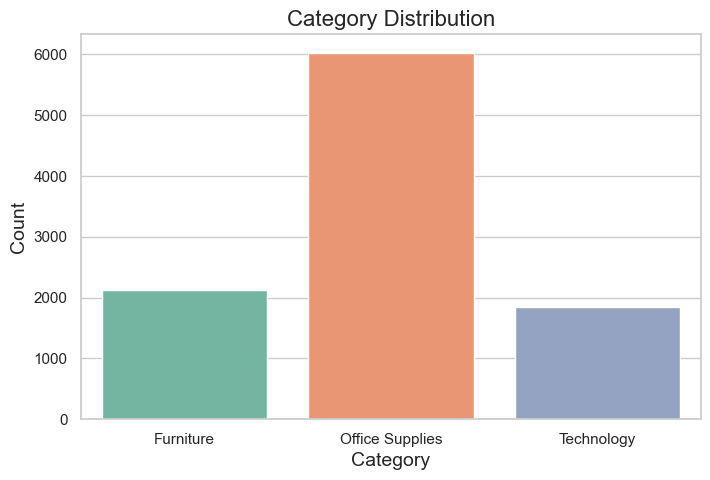

In [12]:
# sale category distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Category Distribution', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

##### This plot gives a clear view of the distribution of sales across different categories, highlighting that the 'Office Supplies' category has the highest number of sales, followed by 'Furniture' and 'Technology'. 

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Total Sales, profit and orders

In [14]:
# total sales, profit and order quantity
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit: ${total_profit:,.2f}')
print(f'Total Quantity Sold: {total_quantity}')

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37873


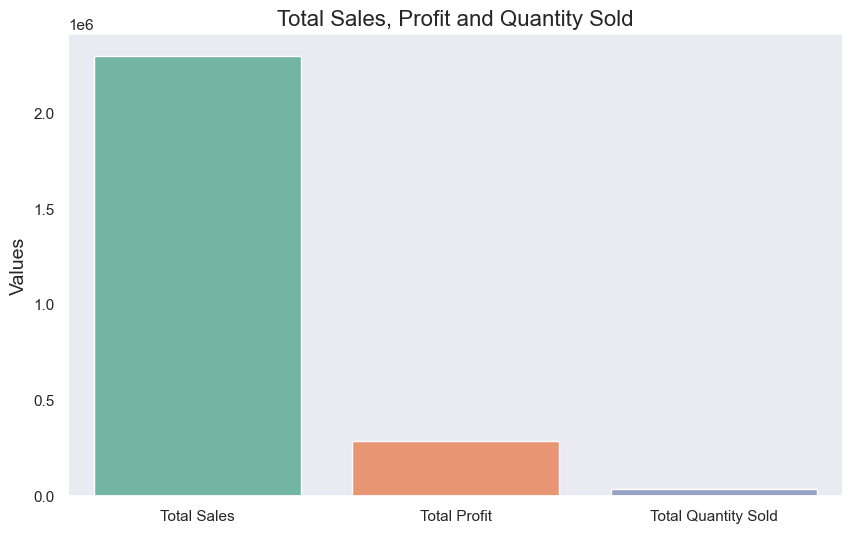

In [15]:
# visualize the total sales, profit and order quantity in a bar chart and use dark background style
sns.set_style('dark')
plt.figure(figsize=(10,6))
metrics = ['Total Sales', 'Total Profit', 'Total Quantity Sold']
values = [total_sales, total_profit, total_quantity]
sns.barplot(x=metrics, y=values, palette='Set2')
plt.title('Total Sales, Profit and Quantity Sold', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.show()



##### This plot above shows the total sales, profit, and quantity sold in a bar chart format. It highlights the significant difference between sales and profit, indicating that while sales are high, profit margins may be lower due to costs. The total quantity sold also provides insight into the volume of products moved. 

#### Top 10 high Selling Products

In [16]:
# products with highest sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

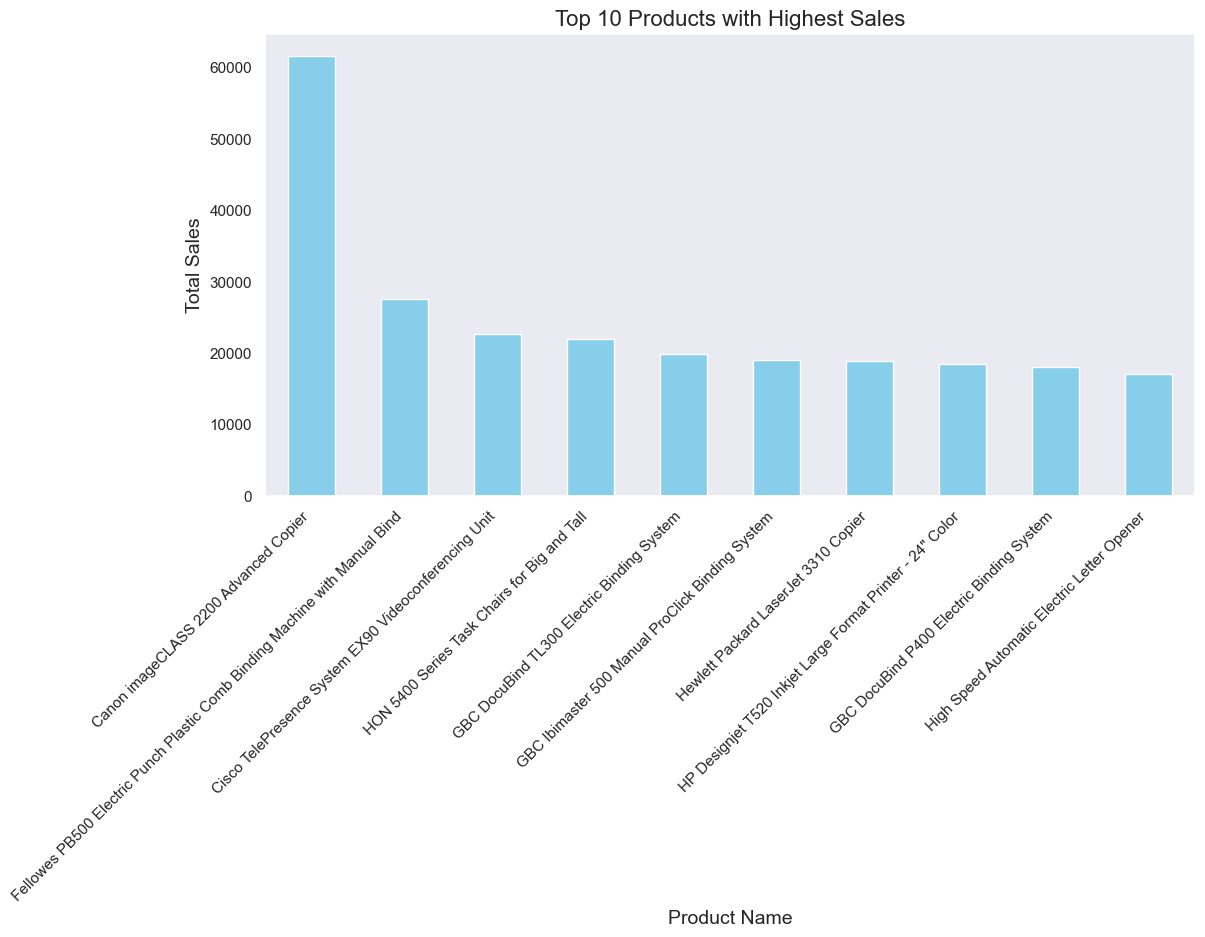

In [17]:
# visualizing products with highest sales
plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products with Highest Sales', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Categorize Wise Sales & Profit

In [18]:
# category wise sales and profit
category_sales_profit = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
category_sales_profit

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


<Figure size 1000x600 with 0 Axes>

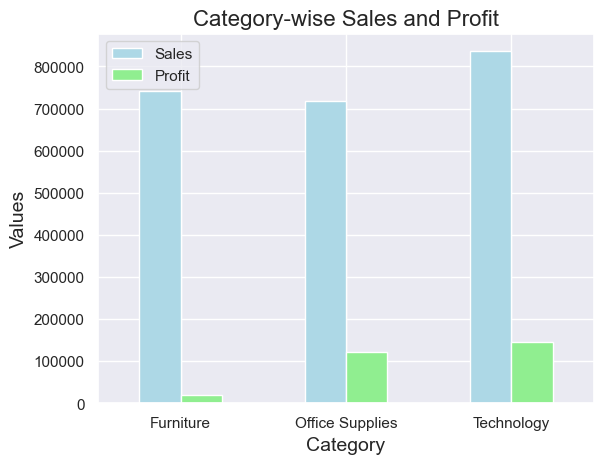

In [19]:
# visualizing categories with highest sales and profit
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
category_sales_profit.set_index('Category').plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Category-wise Sales and Profit', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### This chart is giving a clear view of the distribution of sales across different categories, highlighting that the 'Office Supplies' category has the highest number of sales, followed by 'Furniture' and 'Technology'. 

#### Sub-categories with highest sales

In [20]:
# sub-categories with highest sales
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
subcat_sales

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

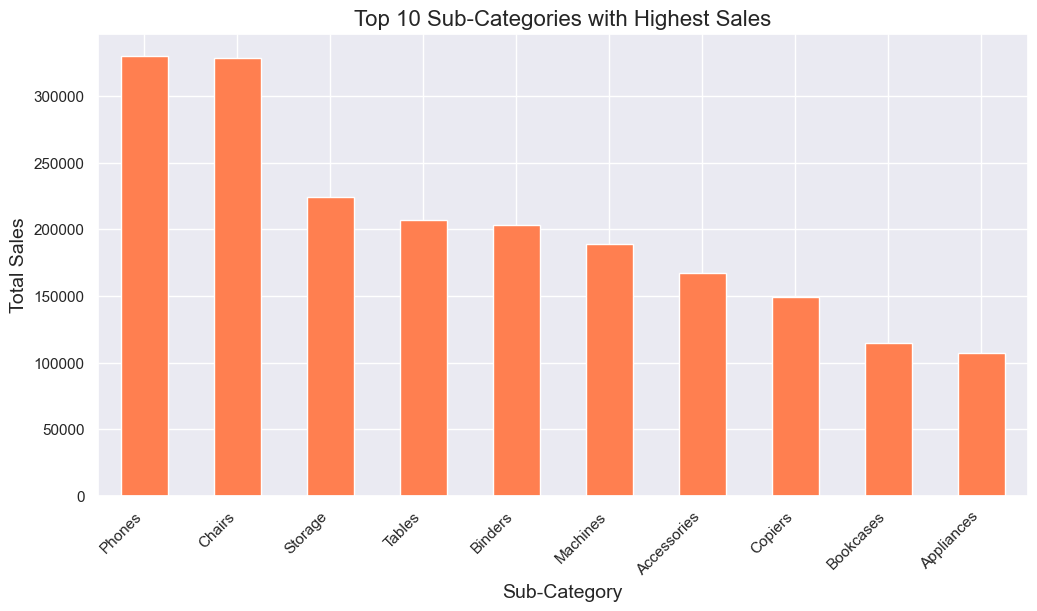

In [21]:
# visualizing sub-categories with highest sales
plt.figure(figsize=(12,6))
subcat_sales.plot(kind='bar', color='coral')
plt.title('Top 10 Sub-Categories with Highest Sales', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


##### According to the plot, phones and chairs are the top-selling sub-categories, followed by binders and paper. 

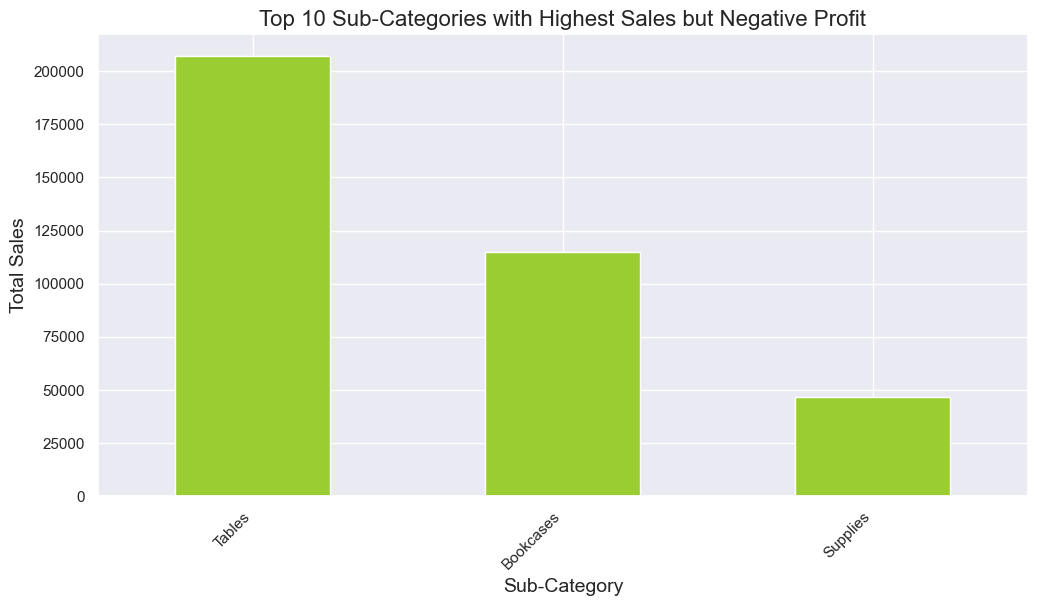

In [22]:
# sub-categories with highest sales but negative profit
subcat_negative_profit = df.groupby('Sub-Category').agg({'Sales':'sum', 'Profit':'sum'})
subcat_negative_profit = subcat_negative_profit[subcat_negative_profit['Profit'] < 0].sort_values(by='Sales', ascending=False).head(10)

#visualizing sub-categories with highest sales but negative profit
plt.figure(figsize=(12,6))
subcat_negative_profit['Sales'].plot(kind='bar', color='yellowgreen')
plt.title('Top 10 Sub-Categories with Highest Sales but Negative Profit', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()




##### This visual shows that high sales in sub-categories are tablets, bookcases and chairs, but they are generating negative profit, indicating potential issues with pricing or costs in these areas.

### Were there discounts available with products with negative profit?

In [23]:
# did products with negative profit have discounts?
negative_profit_discounts = df[df['Profit'] < 0]['Discount']
negative_profit_discounts.describe()


count    1871.000000
mean        0.480887
std         0.235080
min         0.100000
25%         0.200000
50%         0.400000
75%         0.700000
max         0.800000
Name: Discount, dtype: float64

This shows that products with negative profit had an average discount of 0.2 (20%), with a maximum discount of 0.8 (80%). This suggests that higher discounts may have contributed to the negative profit on these products.

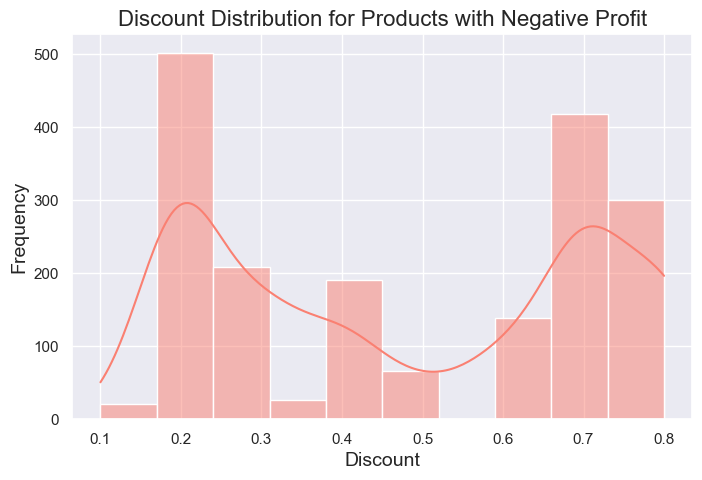

In [24]:
# visualize the discount distribution for products with negative profit
plt.figure(figsize=(8,5))
sns.histplot(negative_profit_discounts, bins=10, kde=True, color='salmon')
plt.title('Discount Distribution for Products with Negative Profit', fontsize=16)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

##### Above the barchart with trendline showing discount distribution for products with negative profit.

## Regions With More Sales And Profit

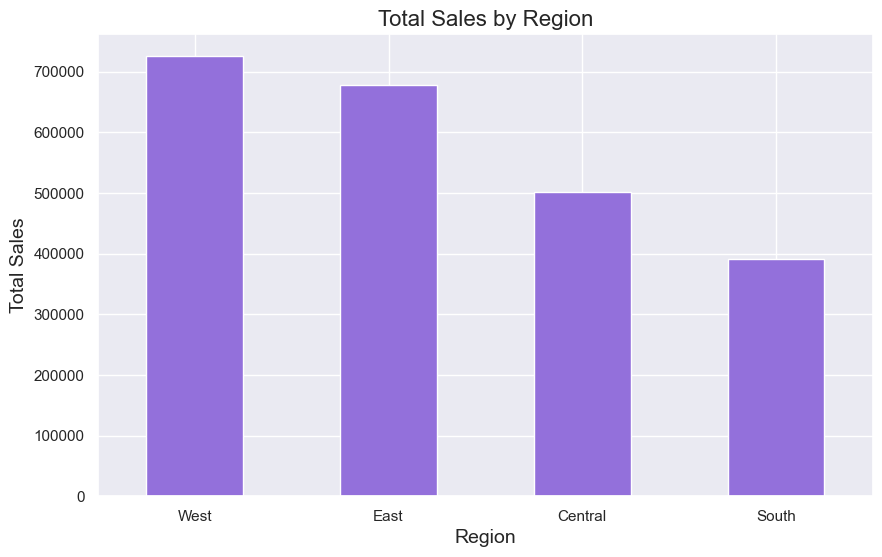

In [25]:
# Regions With More Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# viualizing sales by region
plt.figure(figsize=(10,6))
region_sales.plot(kind='bar', color='mediumpurple')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### Regions with highest sales are West and East, while Central and South have lower sales. 

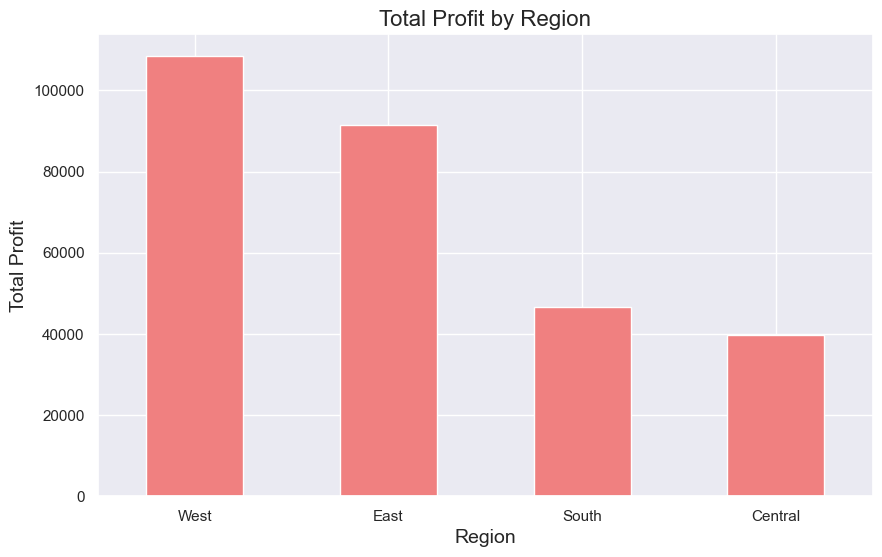

In [26]:
# profit by region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# visualizing profit by region

plt.figure(figsize=(10,6))
region_profit.plot(kind='bar', color='lightcoral')
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### Regions with high profit also have high sales, indicating a positive correlation between sales and profit across regions. The East region leads in both sales and profit, while the Central region has the lowest figures in both metrics.

### Top 10 Customers by sale

In [27]:
# top 10 customers by sale
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

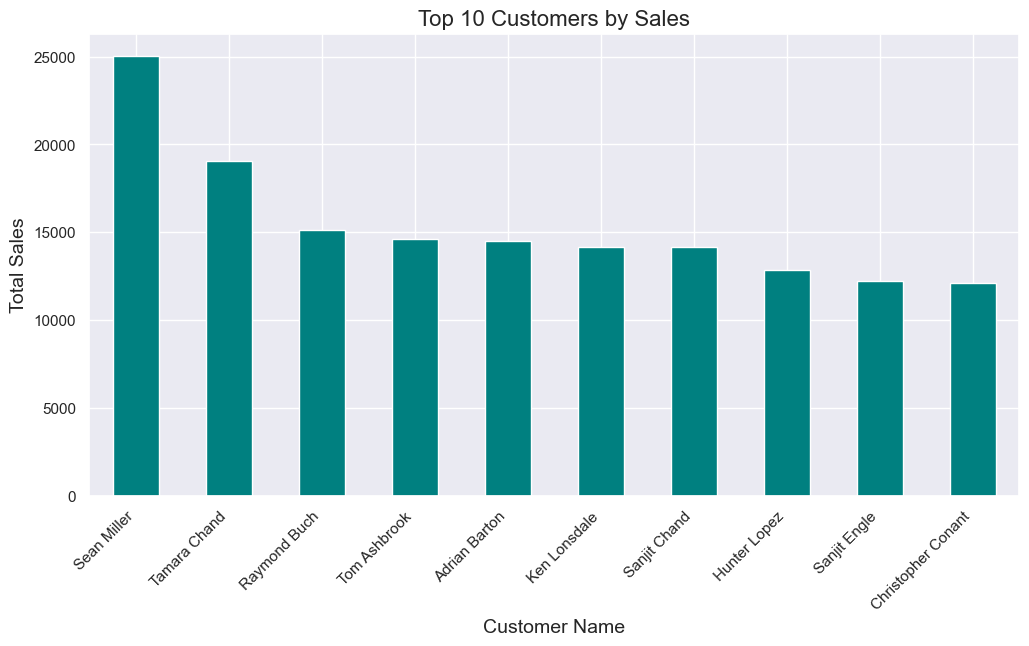

In [28]:
# showing top 10 customers by sale 
plt.figure(figsize=(12,6))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Sales', fontsize=16)
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

### States or cities contribute the most to sales and profit

In [29]:
# cities and states contributing the most to sales and profit
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

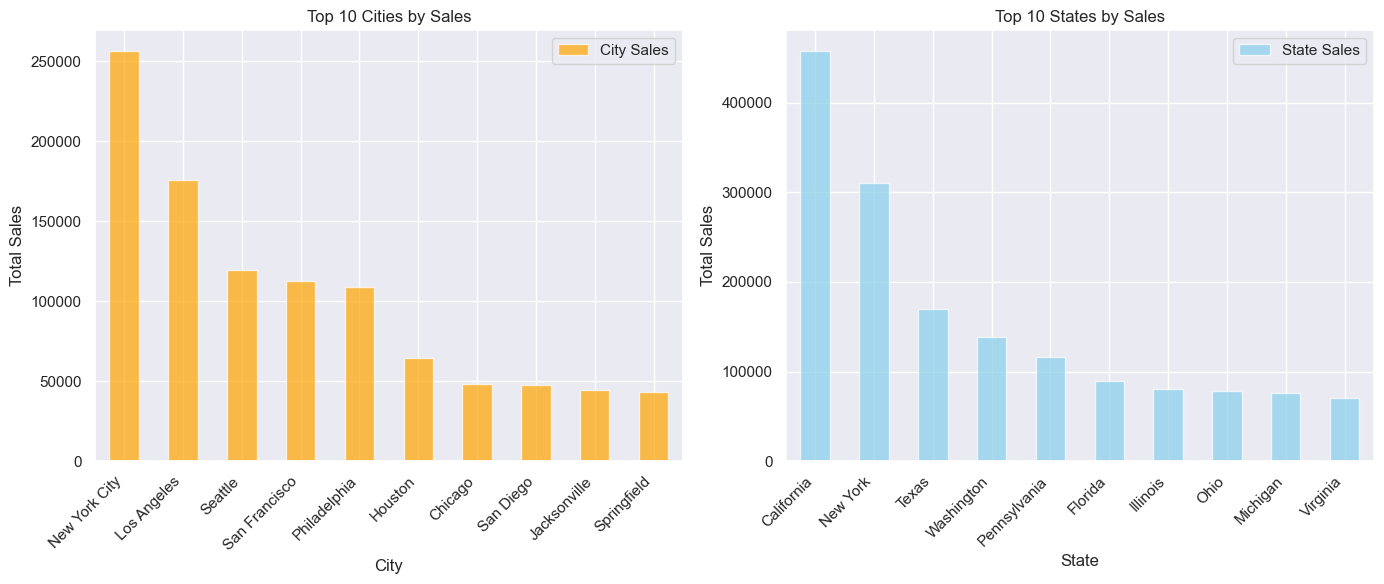

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# First subplot - City Sales
plt.subplot(1,2,1)  # 1 row, 2 columns, 1st chart
city_sales.plot(kind='bar', color='orange', alpha=0.7, label='City Sales')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Second subplot - State Sales
plt.subplot(1,2,2)  # 1 row, 2 columns, 2nd chart
state_sales.plot(kind='bar', color='skyblue', alpha=0.7, label='State Sales')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## Time Series Analysis

### Monthly sales trends over the years

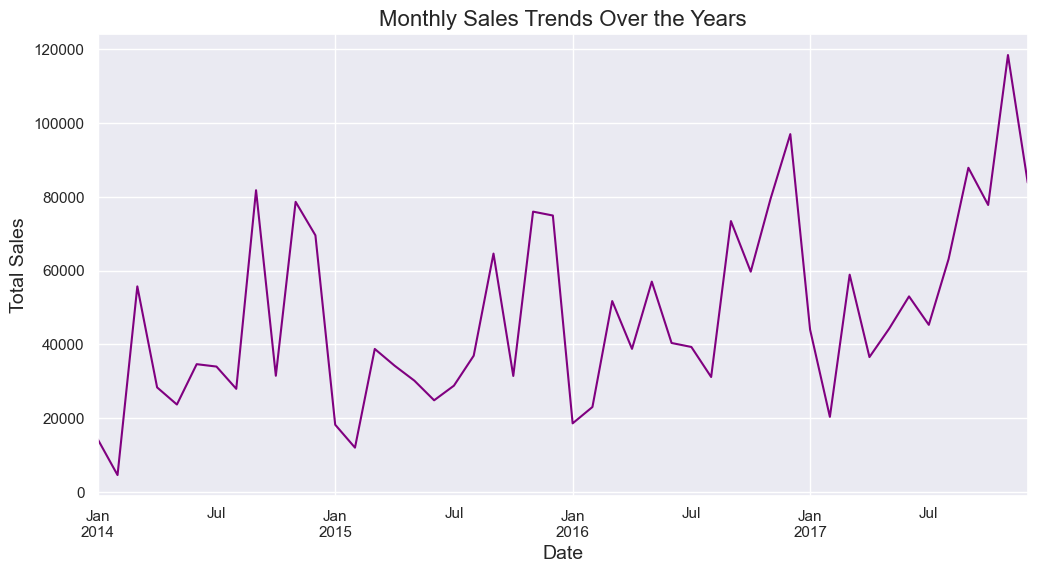

In [31]:
# visualizing monthly sales trends over the years
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.plot(figsize=(12,6), color='purple')
plt.title('Monthly Sales Trends Over the Years', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()


##### The trendline is giving an insights that sales over the years are increasing gradually.

In [32]:
# Which month/quarter has the highest sales?
df['Month'] = df.index.month
monthly_avg_sales = df.groupby('Month')['Sales'].mean()
monthly_avg_sales




Month
1     249.146550
2     199.170838
3     294.548116
4     206.230731
5     210.923553
6     212.996763
7     207.377601
8     225.274877
9     222.451154
10    244.594609
11    239.606438
12    231.032318
Name: Sales, dtype: float64

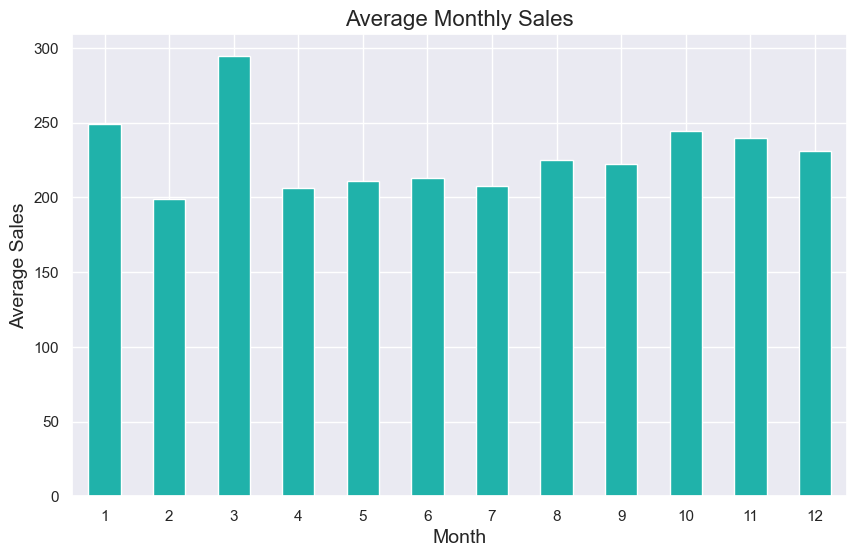

In [33]:

# plotting average monthly sales to identify peak months
plt.figure(figsize=(10,6))
monthly_avg_sales.plot(kind='bar', color='lightseagreen')
plt.title('Average Monthly Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### This plot shows that the months with the highest average sales are November and December, indicating a seasonal trend likely due to holiday shopping.

### Is there a seasonal effect (e.g., holiday season spikes)?

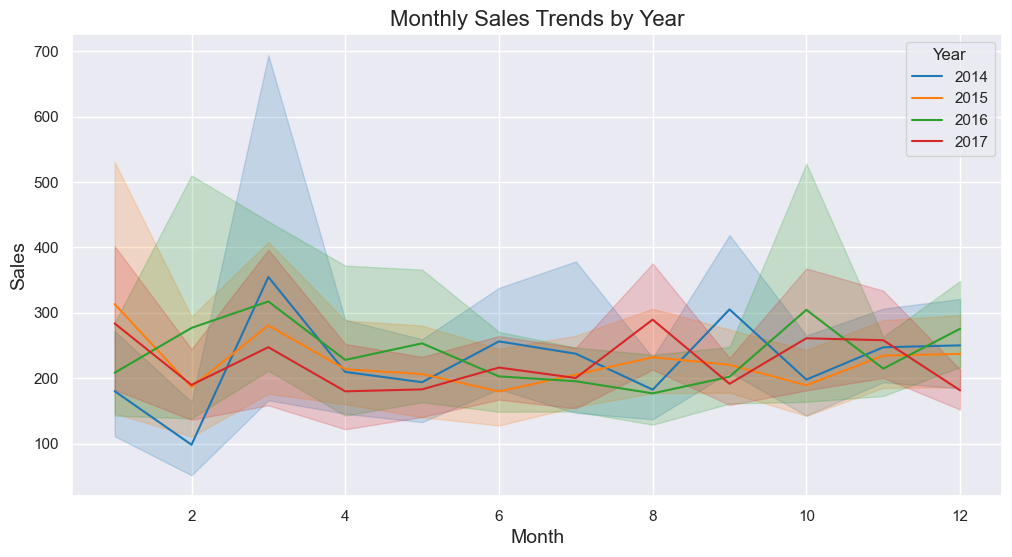

In [34]:
# identifying seasonal effects by plotting monthly sales over multiple years
df['Year'] = df.index.year
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index.month, y='Sales', hue='Year', palette='tab10')
plt.title('Monthly Sales Trends by Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

##### This plot shows that seasonal spikes are evident in November and December across multiple years, indicating a strong holiday season effect on sales.

### Change in Profit over the year

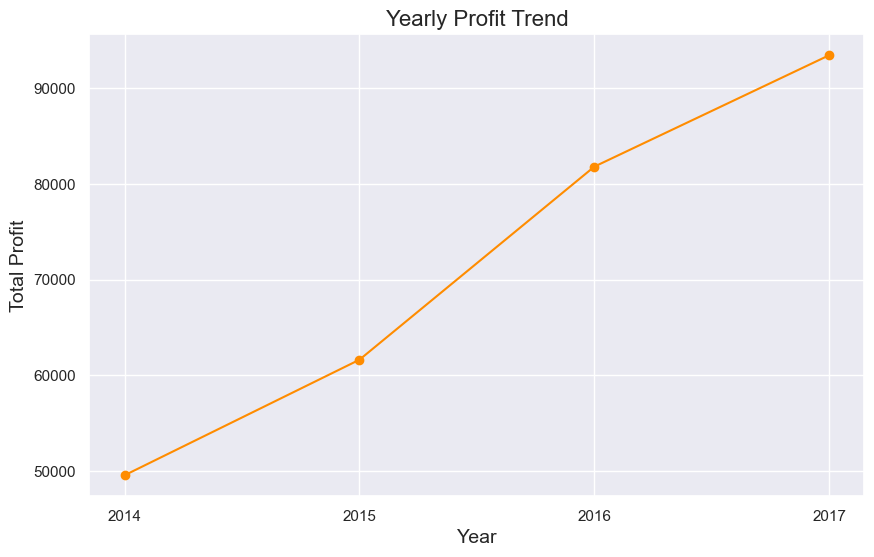

In [35]:
# How has profit changed year over year? A line chart would be useful here.
yearly_profit = df.groupby('Year')['Profit'].sum()
plt.figure(figsize=(10,6))
yearly_profit.plot(marker='o', color='darkorange')
plt.title('Yearly Profit Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(yearly_profit.index)
plt.show()

##### The line chart shows a general upward trend in profit over the years, with some fluctuations. Notably, there is a dip in profit in 2018, but it recovers in subsequent years, indicating overall growth in profitability.

### Which products are most profitable?

In [36]:
# products with highest profit margins
df['Profit Margin'] = df['Profit'] / df['Sales']
top_profit_margin_products = df.groupby('Product Name')['Profit Margin'].mean().sort_values(ascending=False).head(10)
top_profit_margin_products

Product Name
Southworth Structures Collection                                                         0.50
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier                    0.50
Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book    0.50
Avery 475                                                                                0.50
Xerox 1890                                                                               0.50
Tops Green Bar Computer Printout Paper                                                   0.50
Avery 5                                                                                  0.49
Xerox 1918                                                                               0.49
Avery 478                                                                                0.49
Personal Creations Ink Jet Cards and Labels                                              0.49
Name: Profit Margin, dtype: float64

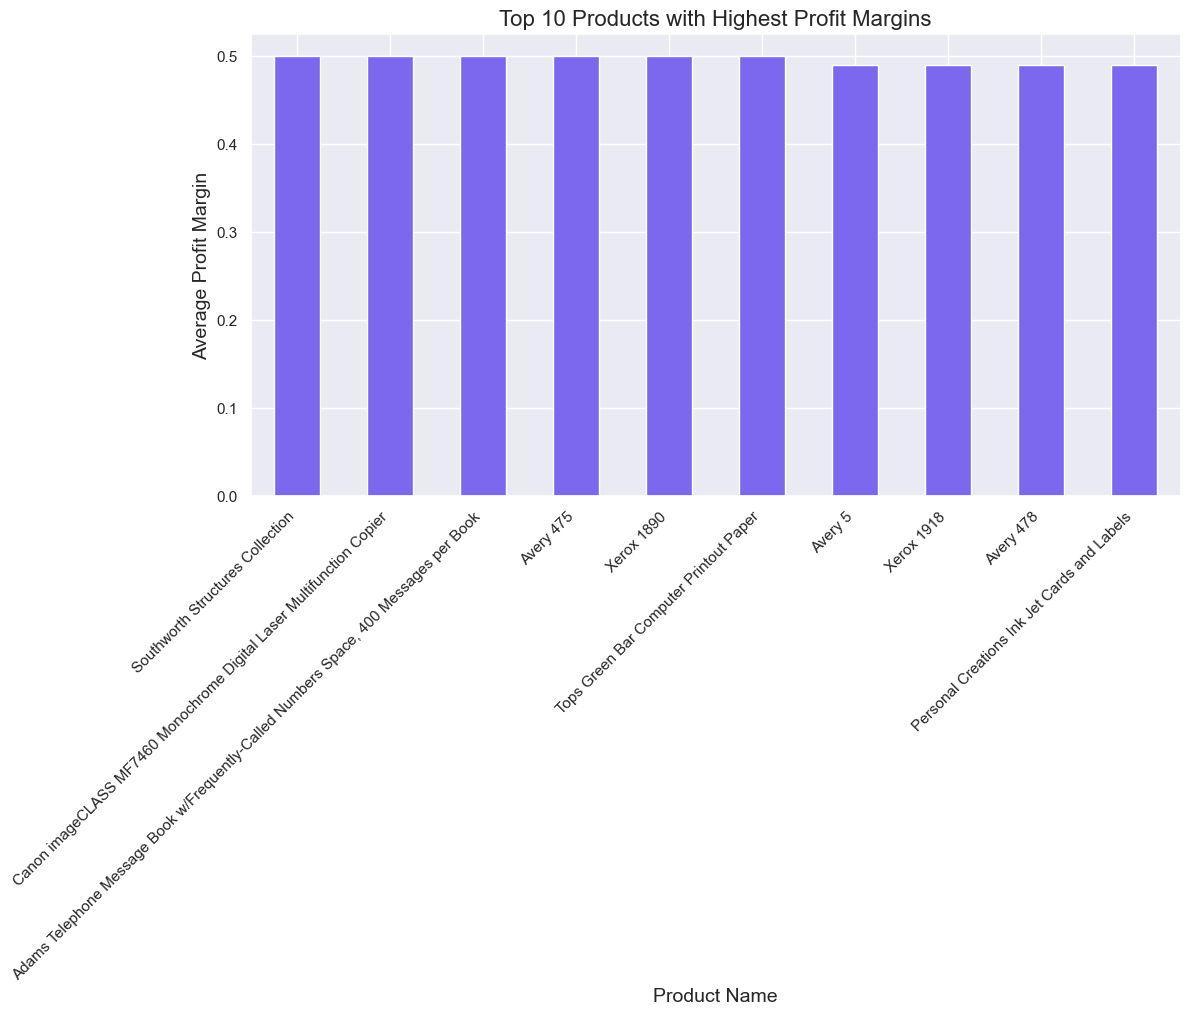

In [37]:
# visualizing products with highest profit margins
plt.figure(figsize=(12,6))
top_profit_margin_products.plot(kind='bar', color='mediumslateblue')
plt.title('Top 10 Products with Highest Profit Margins', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Average Profit Margin', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

### Which products are most loss making?

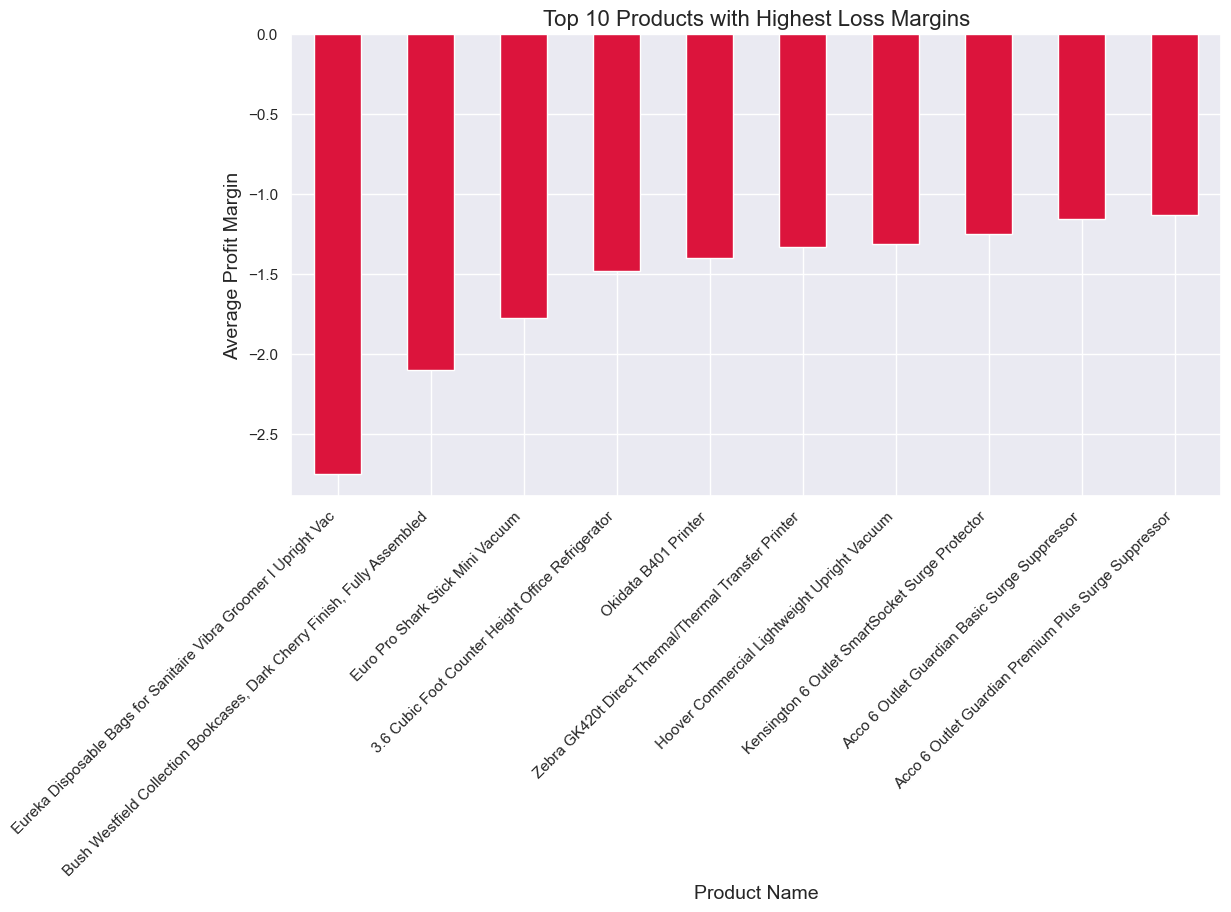

In [ ]:
# visualizing products with highest loss margins
plt.figure(figsize=(12,6))
top_loss_margin_products = df.groupby('Product Name')['Profit Margin'].mean().sort_values().head(10)
top_loss_margin_products.plot(kind='bar', color='crimson')
plt.title('Top 10 Products with Highest Loss Margins', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Average Profit Margin', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

##### This plot shows that the following products have the highest loss margins, indicating they are the most loss-making items in the dataset. These products should be reviewed for pricing, cost management, or promotional strategies to improve profitability.

### What is the average discount given on different categories?

In [39]:
# average discount given on different categories
avg_discount_category = df.groupby('Category')['Discount'].mean()
avg_discount_category

Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

##### More discount is given to Furniture and Office Supplies compared to Technology

### Does giving a discount always increase sales/profit?

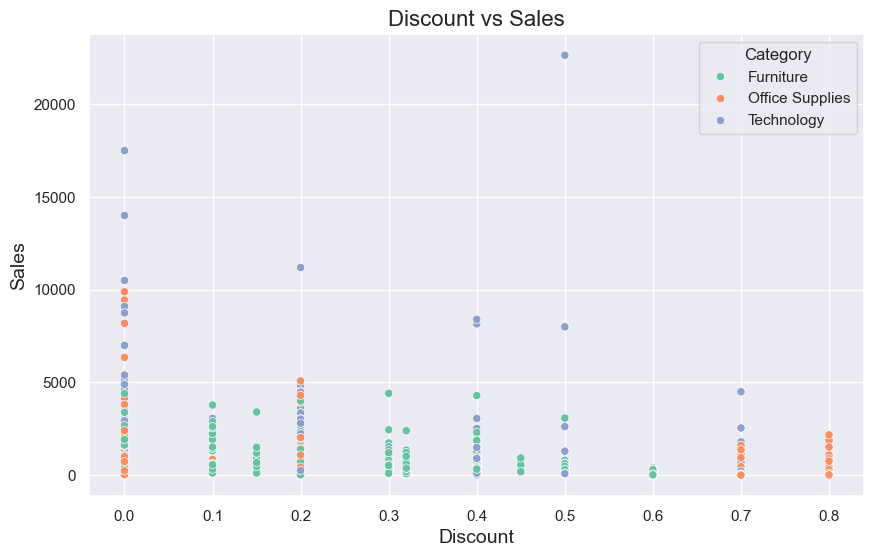

In [41]:
# is discount correlated with sales/profit?
# scatter plot of discount vs sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category', palette='Set2')
plt.title('Discount vs Sales', fontsize=16)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

In [43]:
# cor of sales with discount
df[['Sales', 'Discount']].corr()
# cor of profit with discount
df[['Profit', 'Discount']].corr()



,Profit,Discount
Profit,1.000000,-0.219487
Discount,-0.219487,1.000000


##### The corr values indicate a weak negative correlation between discount and both sales and profit. This suggests that higher discounts do not necessarily lead to higher sales or profits in this dataset.

## Does shipping mode affect delivery time or profit?

In [45]:
# does shipping mode affect delivery time or profit?
df.reset_index(inplace=True)
df['Delivery Time'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days
shipping_mode_profit = df.groupby('Ship Mode').agg({'Profit':'mean', 'Delivery Time':'mean'}).reset_index()
shipping_mode_profit


,Ship Mode,Profit,Delivery Time
0,First Class,31.839948,2.182705
1,Same Day,29.266591,0.044199
2,Second Class,29.535545,3.238046
3,Standard Class,27.494770,5.006535


##### The corr between shipping mode and delivery time/profit is not very high, indicating that other factors may be more influential in determining delivery time and profit.

## Which regions/products should the company focus on to maximize profit?

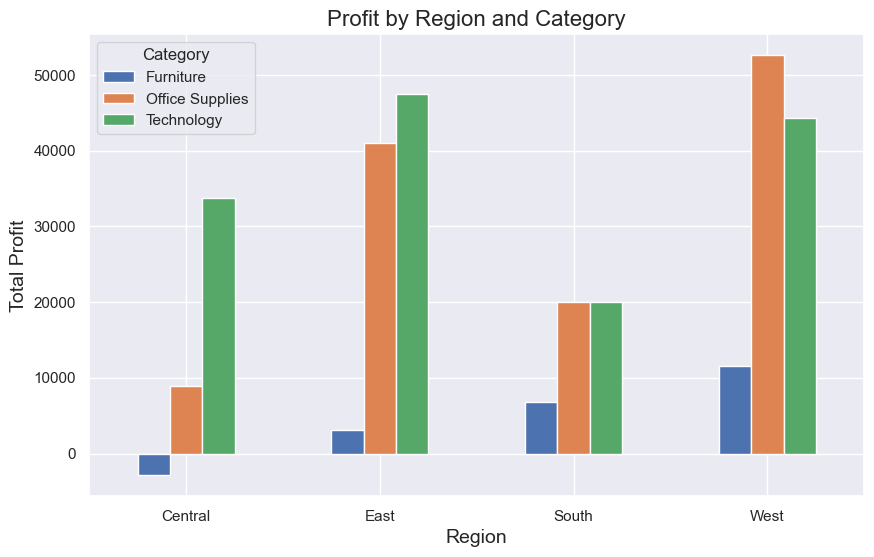

In [47]:
# regions or products should the company focus on to maximize profit?
df.columns
region_product_profit = df.groupby(['Region', 'Category']).agg({'Profit':'sum'}).reset_index()
region_product_profit
region_product_profit.pivot(index='Region', columns='Category', values='Profit').plot(kind='bar', figsize=(10,6))
plt.title('Profit by Region and Category', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=0)
plt.show()

##### This is showing that the company should focus on Technology products in the East, West and Central. Office-supplies in West and East region to maximize profit. 